In [262]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

Data cleaning

In [263]:
heart_df=pd.read_csv("CHD_preprocessed.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [264]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [265]:
heart_df.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [266]:
heart_df.describe()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [267]:
heart_df.groupby('TenYearCHD').mean()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,
0,0.409700,48.730100,0.491298,8.836519,0.027104,0.003994,0.275892,0.019116,235.115835,130.323110,82.133524,25.654182,75.820827,80.800000
1,0.525478,54.173567,0.514331,10.581210,0.074841,0.017516,0.507962,0.062102,245.307325,143.774682,86.995223,26.472812,76.507962,88.345541


**Exploratory Analysis**

Data Visualization

In [268]:
heart_df.TenYearCHD.value_counts()

0    3505
1     628
Name: TenYearCHD, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

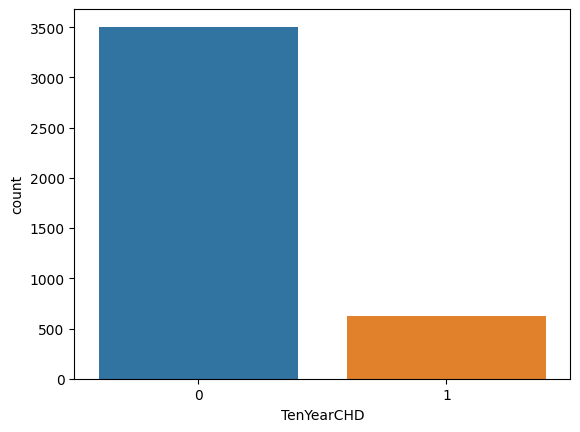

In [269]:
sns.countplot(x='TenYearCHD',data=heart_df)

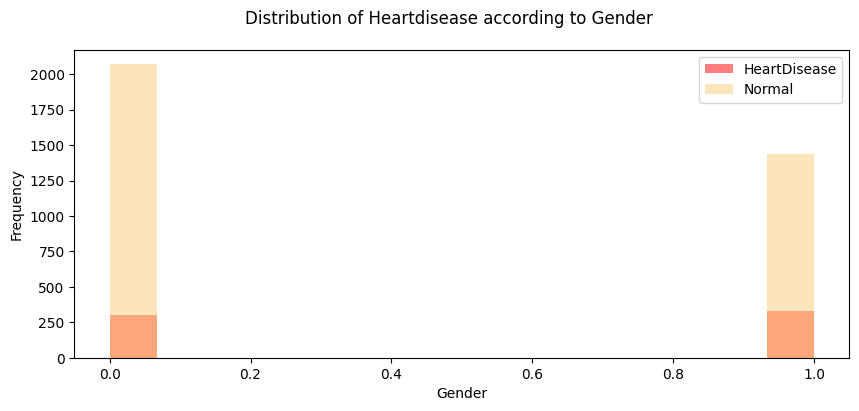

In [270]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(heart_df[heart_df["TenYearCHD"]==1]["gender"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heart_df[heart_df["TenYearCHD"]==0]["gender"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Heartdisease according to Gender")

ax.legend();

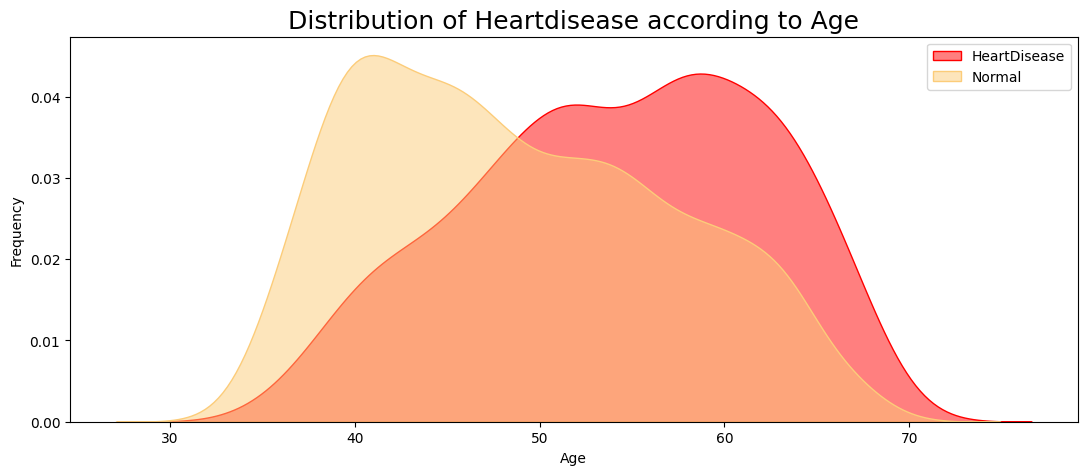

In [271]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["age"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["age"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to Age', fontsize = 18)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

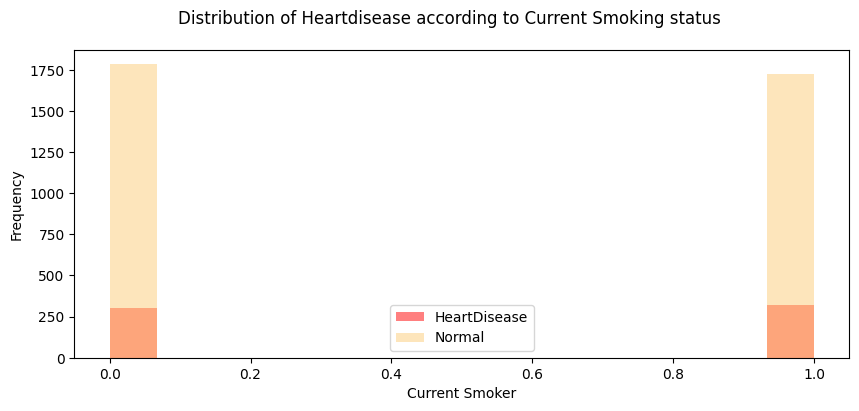

In [272]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(heart_df[heart_df["TenYearCHD"]==1]["currentSmoker"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heart_df[heart_df["TenYearCHD"]==0]["currentSmoker"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Current Smoker")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Heartdisease according to Current Smoking status")

ax.legend();

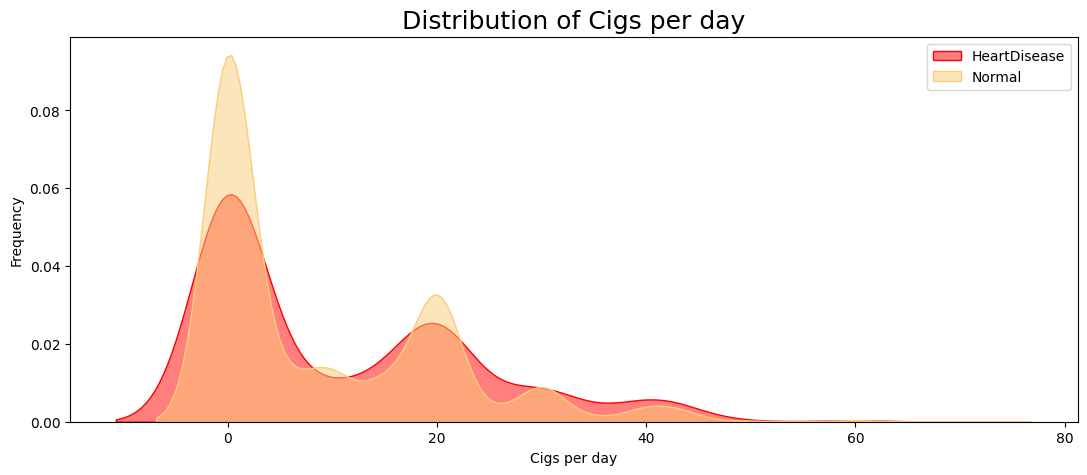

In [273]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["cigsPerDay"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["cigsPerDay"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Cigs per day', fontsize = 18)
ax.set_xlabel("Cigs per day")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

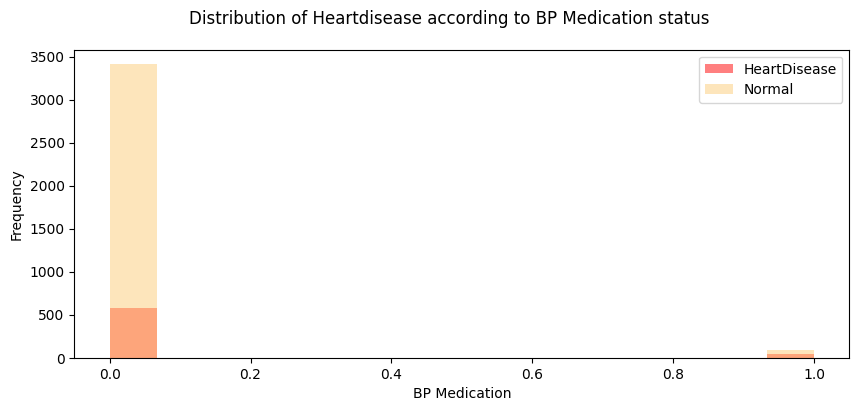

In [274]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(heart_df[heart_df["TenYearCHD"]==1]["BPMeds"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heart_df[heart_df["TenYearCHD"]==0]["BPMeds"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("BP Medication")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Heartdisease according to BP Medication status")

ax.legend();

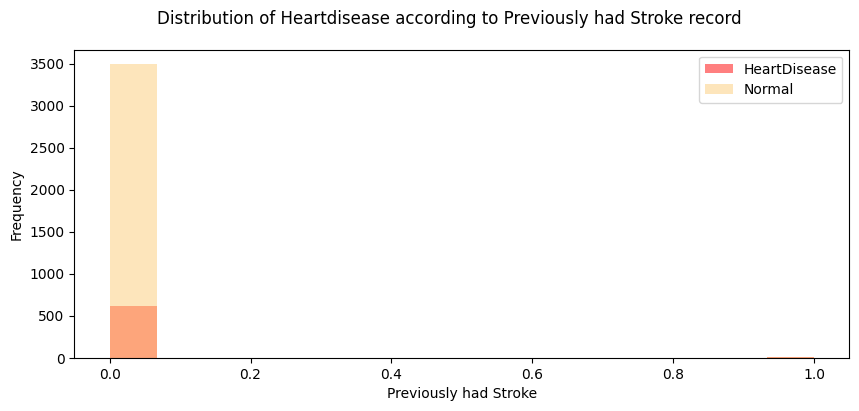

In [275]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(heart_df[heart_df["TenYearCHD"]==1]["prevalentStroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heart_df[heart_df["TenYearCHD"]==0]["prevalentStroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Previously had Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Heartdisease according to Previously had Stroke record")

ax.legend();

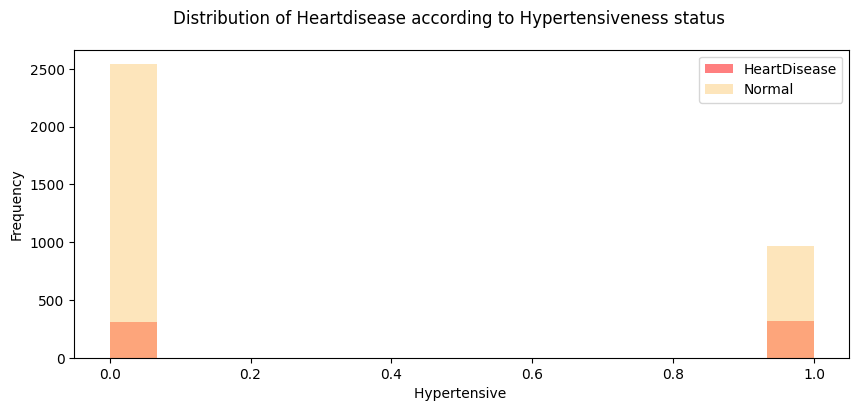

In [276]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(heart_df[heart_df["TenYearCHD"]==1]["prevalentHyp"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heart_df[heart_df["TenYearCHD"]==0]["prevalentHyp"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Hypertensive ")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Heartdisease according to Hypertensiveness status")

ax.legend();

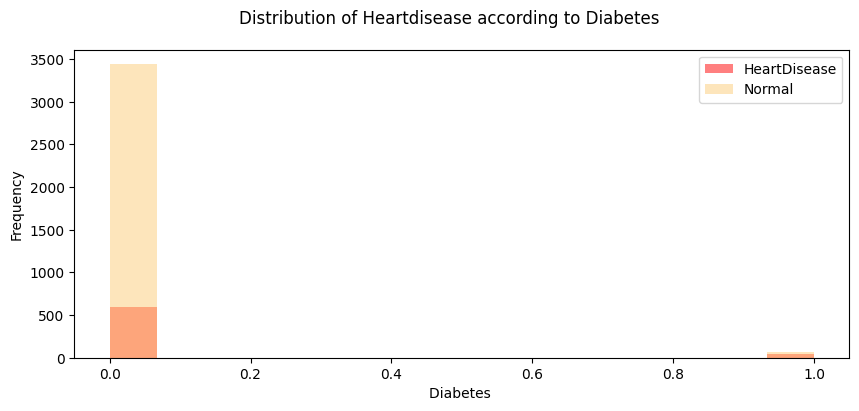

In [277]:
fig, ax = plt.subplots(figsize = (10,4))

ax.hist(heart_df[heart_df["TenYearCHD"]==1]["diabetes"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(heart_df[heart_df["TenYearCHD"]==0]["diabetes"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Diabetes ")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Heartdisease according to Diabetes")

ax.legend();

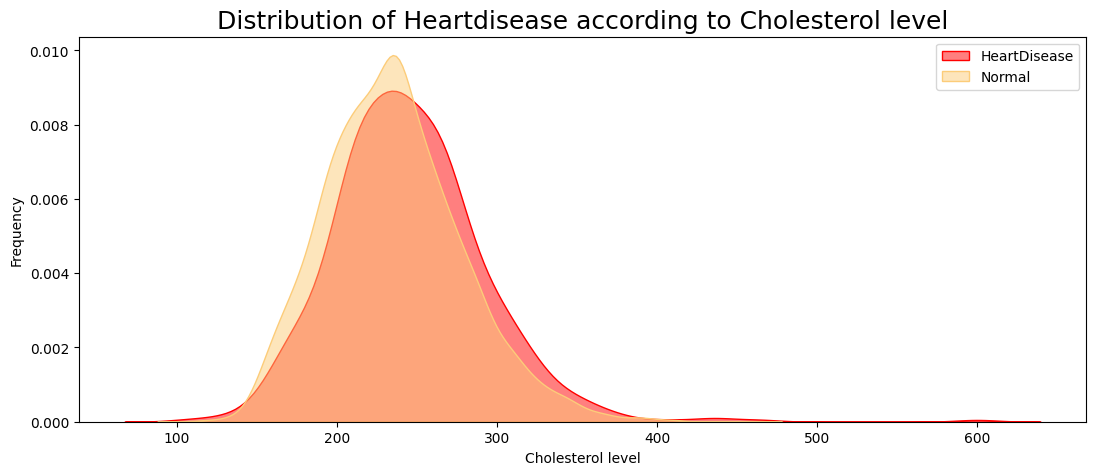

In [278]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["totChol"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["totChol"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to Cholesterol level', fontsize = 18)
ax.set_xlabel("Cholesterol level")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

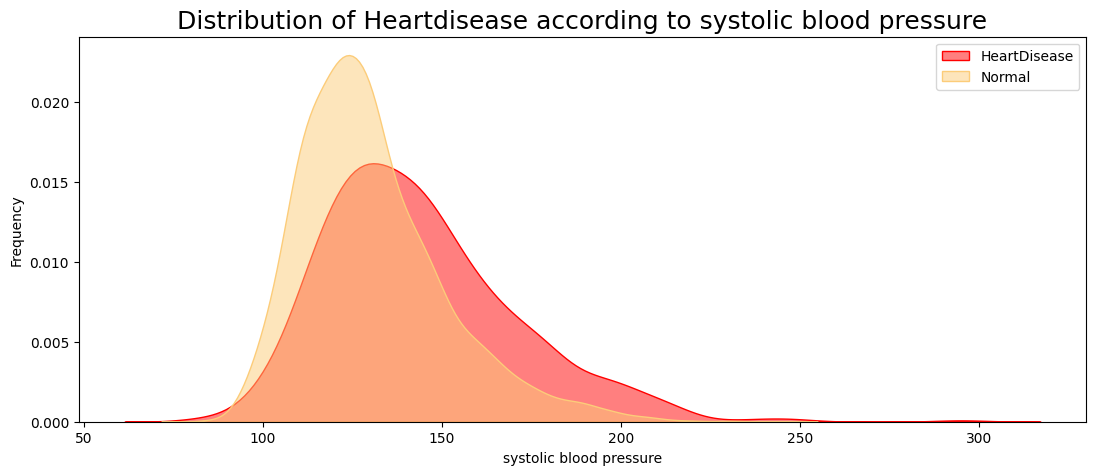

In [279]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["sysBP"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["sysBP"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to systolic blood pressure', fontsize = 18)
ax.set_xlabel("systolic blood pressure")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

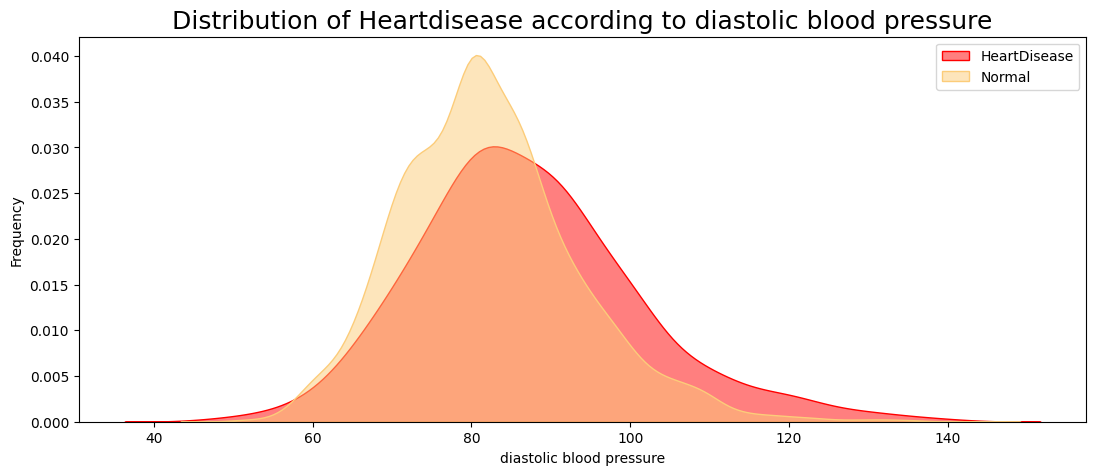

In [280]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["diaBP"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["diaBP"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to diastolic blood pressure', fontsize = 18)
ax.set_xlabel("diastolic blood pressure")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

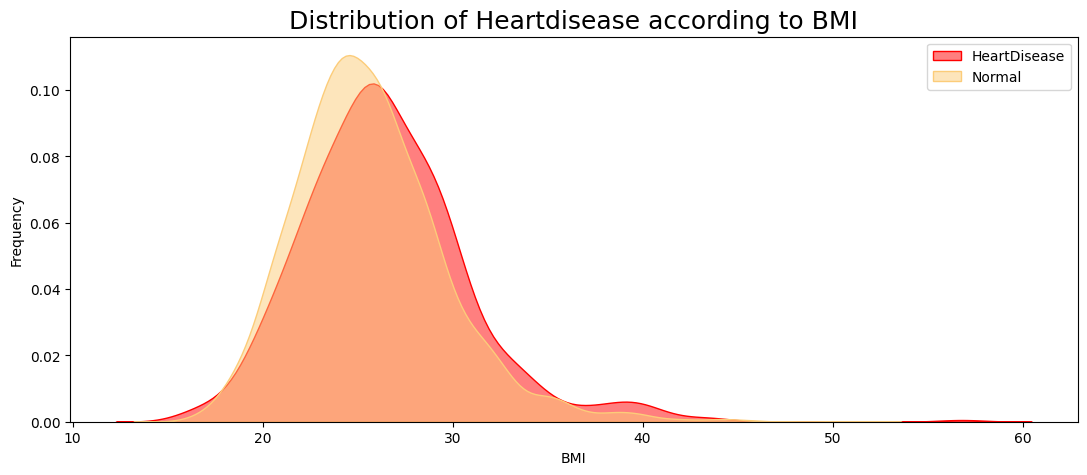

In [281]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["BMI"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["BMI"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to BMI', fontsize = 18)
ax.set_xlabel("BMI")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

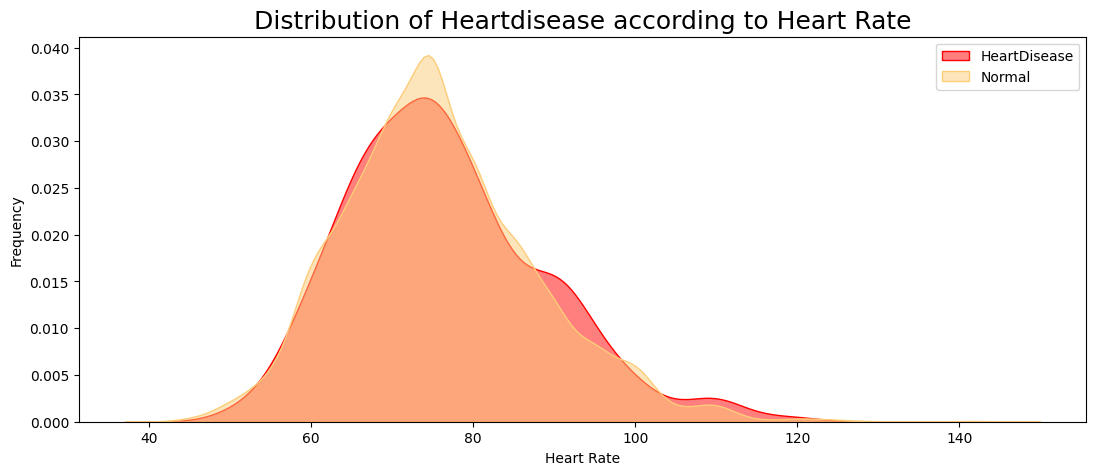

In [282]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["heartRate"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["heartRate"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to Heart Rate', fontsize = 18)
ax.set_xlabel("Heart Rate")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

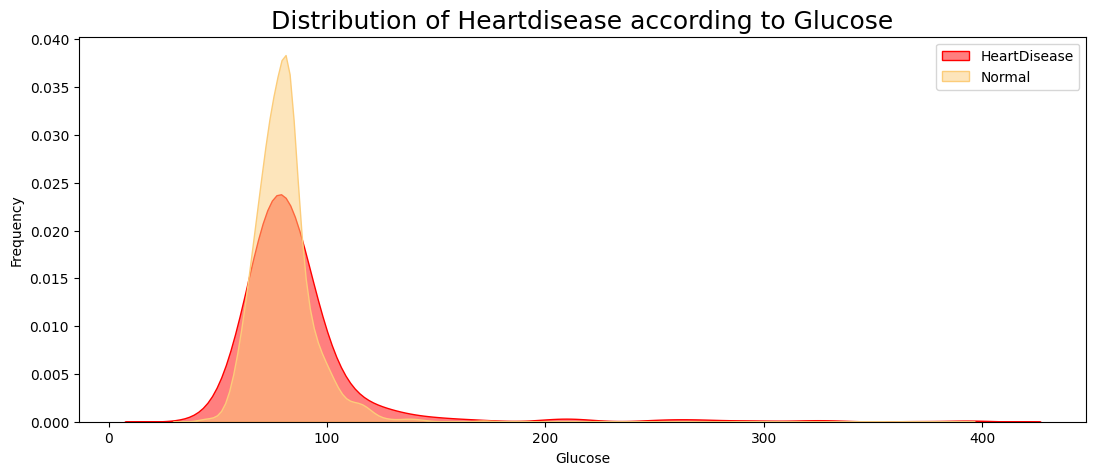

In [283]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==1]["glucose"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(heart_df[heart_df["TenYearCHD"]==0]["glucose"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Heartdisease according to Glucose', fontsize = 18)
ax.set_xlabel("Glucose")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

Data Standardization

In [284]:
# separating the data and labels
X = heart_df.drop(columns = 'TenYearCHD', axis=1)
Y = heart_df['TenYearCHD']

In [285]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
print(X)

[[ 1.15772065 -1.233235   -0.9896495  ...  0.29245652  0.3382184
  -0.2164007 ]
 [-0.86376623 -0.4155346  -0.9896495  ...  0.72447848  1.58326617
  -0.2601487 ]
 [ 1.15772065 -0.18190591  1.01045875 ... -0.10765474 -0.07679753
  -0.52263669]
 ...
 [-0.86376623 -0.18190591  1.01045875 ... -0.92751461  0.67023114
   0.17733129]
 [-0.86376623 -0.64916328  1.01045875 ... -1.62464097  0.83623751
   0.0023393 ]
 [-0.86376623  0.28535147 -0.9896495  ... -1.05761214  0.3382184
   1.09603927]]


 Split Dataset for Training and Testing

In [286]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size = .2, random_state = 44)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', Y_train.shape)
print('Shape of training label:', Y_test.shape)

Shape of training feature: (3306, 14)
Shape of testing feature: (827, 14)
Shape of training label: (3306,)
Shape of training label: (827,)


Modelling

In [287]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [288]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, Y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.814993954050786
Precision: 0.23076923076923078
Recall: 0.06818181818181818
F1 Score: 0.10526315789473682
Cohens Kappa Score: 0.03500583430571769
Area Under Curve: 0.6366197950730326
Confusion Matrix:
 [[665  30]
 [123   9]]


In [289]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, Y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.75453446191052
Precision: 0.26490066225165565
Recall: 0.30303030303030304
F1 Score: 0.28268551236749123
Cohens Kappa Score: 0.13542283586624582
Area Under Curve: 0.5716590364072378
Confusion Matrix:
 [[584 111]
 [ 92  40]]


In [290]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

logreg_eval = evaluate_model(logreg, X_test, Y_test)

# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Area Under Curve:', logreg_eval['auc'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.8440145102781137
Precision: 0.6363636363636364
Recall: 0.05303030303030303
F1 Score: 0.09790209790209792
Cohens Kappa Score: 0.0751926627772912
Area Under Curve: 0.7228253760627861
Confusion Matrix:
 [[691   4]
 [125   7]]


Comparison

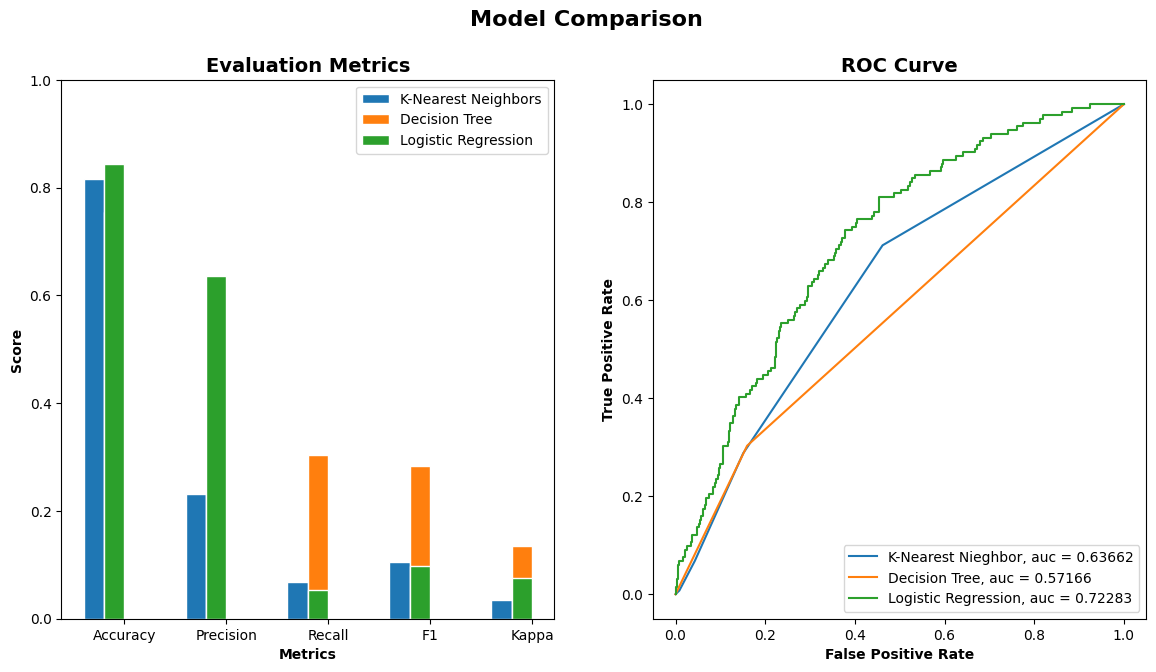

In [291]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
logreg_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1'], logreg_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(knn_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r1]

## Make the plot

ax1.bar(r1, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r2, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, logreg_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(knn_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(logreg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

<Axes: >

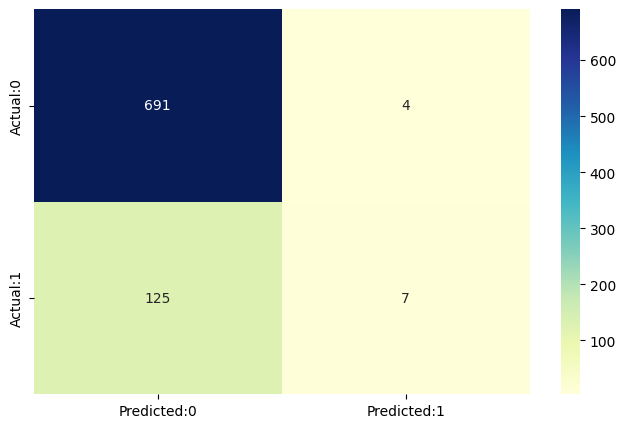

In [292]:
from sklearn.metrics import confusion_matrix
cm=logreg_eval['cm']
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [293]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [294]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8440145102781137 
 The Missclassification = 1-Accuracy =  0.1559854897218863 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.05303030303030303 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9942446043165467 
 Positive Predictive value = TP/(TP+FP) =  0.6363636363636364 
 Negative predictive Value = TN/(TN+FN) =  0.8468137254901961 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  9.214015151515067 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9524514318291454


In [295]:
input_data = (0	,50,	0,	0,	0,	0,	0,	0,	254,	133,	76,	22.91,	75,	76)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = clf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not with heart disease')
else:
  print('The person is with heart disease')

[[-0.86376623  0.05172278 -0.9896495  -0.76375118 -0.18862676 -0.07801081
  -0.67208894 -0.16224156  0.39485333  0.02866944 -0.57502537 -0.70413962
  -0.07679753 -0.2601487 ]]
[0]
The person is not with heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
